In [1]:
#import general paython pakages
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#! pip install pydotplus

# Step 1: Import the housing data as a data frame and ensure that the data is loaded properly.


In [3]:
#read the "train.csv" file
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.shape
#df.describe

(1460, 81)

# Step 2: Drop the "Id" column and any features that are missing more than 40% of their values

In [5]:
#display the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#drop 'Id' column
df = df.drop(['Id'], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#drop any feature that are missung more than 40% of the vslues
df1 = df.drop(df.columns[df.isnull().mean()>.40], axis=1)
df1.head(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


# Step 3: For numerical columns, fill in any missing data with the median value.

In [8]:
#fill in any missing data with the median value for numerical data
#df1['User_Score'].fillna(df1['User_Score'].median(), inplace = True)
#df1
df1_n = df1.fillna(df.median(), inplace = True)
df1.head(15)

C:\Users\Yousof\AppData\Local\Temp/ipykernel_4136/2268790234.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1_n = df1.fillna(df.median(), inplace = True)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


# Step 4: For categorical columns, fill in any missing data with the most common value (mode)

In [9]:
missing_categorical = [var for var in df1.columns if df1[var].isnull().mean()>0
                      and df1[var].dtypes == 'O']

In [10]:
missing_categorical

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [11]:
df1.mode()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,69.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,140000


In [12]:
#display mode values for categorical columns
df1_c = df1[['MasVnrType', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond']].mode()

In [13]:
#fill in missing data with the mode value for categorical column
df1_c[['MasVnrType', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond']].fillna({'None': '', 'TA': '', 'TA': '', 'NO': '', 'Unf': '',  'SBrkr': '',
                                                         'Attchd': '', 'Unf': '','TA': '', 'TA': ''}, inplace = True)
#df1['MasVnrType'].fillna('None', inplace = True)

In [14]:
#df1['MasVnrType'].mode()

In [15]:
#fill in missing data with the mode value for categorical column
df1_c['MasVnrType'].fillna('None', inplace = True)
df1_c['BsmtQual'].fillna('TA', inplace = True)
df1_c['BsmtCond'].fillna('TA', inplace = True)
df1_c['BsmtExposure'].fillna('NO', inplace = True)
df1_c['BsmtFinType1'].fillna('Unf', inplace = True)
df1_c['BsmtFinType2'].fillna('Unf', inplace = True)
df1_c['Electrical'].fillna('SBrkr', inplace = True)
df1_c['GarageType'].fillna('Attchd', inplace = True)
df1_c['GarageFinish'].fillna('Unf', inplace = True)
df1_c['GarageQual'].fillna('TA', inplace = True)
df1_c['GarageCond'].fillna('TA', inplace = True)


In [16]:
#display the missing data
df1_c[['MasVnrType', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond']].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [17]:
#display the missung data
df1.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
df1.mean()

C:\Users\Yousof\AppData\Local\Temp/ipykernel_4136/2053335143.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean()


MSSubClass           56.897260
LotFrontage          69.863699
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.117123
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.589041
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPorch          15.060959
PoolArea

In [19]:
df.median()

C:\Users\Yousof\AppData\Local\Temp/ipykernel_4136/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float64

# Step 5: Convert the categorical columns to dummy variables.

In [20]:
# create dummy variables for categorical columns 
pd.get_dummies(df1_c)

,MasVnrType_None,BsmtQual_TA,BsmtCond_TA,BsmtExposure_No,BsmtFinType1_Unf,BsmtFinType2_Unf,Electrical_SBrkr,GarageType_Attchd,GarageFinish_Unf,GarageQual_TA,GarageCond_TA
0,1,1,1,1,1,1,1,1,1,1,1


In [21]:
# create dummy variables  
pd.get_dummies(df1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [22]:
# Second way to convert the categorical columns to numerical columns 
categorical_columns = df.select_dtypes('object')
pd.get_dummies(df, columns = categorical_columns.columns)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


# Step  6: Split the data into a training and test set, where the SalePrice column is the target.

In [23]:
x = df1[['LotArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
y = df1['SalePrice']

In [24]:
x

,LotArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr
0,8450,2003,856,2,1,3
1,9600,1976,1262,2,0,3
2,11250,2001,920,2,1,3
3,9550,1915,756,1,0,3
4,14260,2000,1145,2,1,4
...,...,...,...,...,...,...
1455,7917,1999,953,2,1,3
1456,13175,1978,1542,2,0,3
1457,9042,1941,1152,2,0,4
1458,9717,1950,1078,1,0,2


In [25]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [26]:
# Importing trained test method
from sklearn.model_selection import train_test_split

In [27]:
# Use trained test method
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2) 

In [28]:
len(x_train)

1168

In [29]:
len(x_test)

292

In [30]:
x_train

,LotArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr
782,16285,2001,1413,2,0,3
551,6000,1957,928,1,0,3
1152,14115,1956,1073,1,0,2
596,3600,1910,684,1,0,3
866,10656,2006,1638,2,0,3
...,...,...,...,...,...,...
210,5604,1925,864,1,0,2
335,164660,1965,1499,2,0,3
1233,12160,1959,1188,1,0,3
1222,10496,1949,1040,2,0,3


In [31]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [32]:
clf.fit(x_train,y_train)

LinearRegression()

In [33]:
clf.predict(x_test)

array([239572.75102661, 216191.2950273 , 267684.06100602, 122167.09563591,
       232071.60108173,  49849.67811538, 144555.36878434, 118380.92187107,
       200455.40830374, 122530.94719894, 129299.35186873, 232648.91771694,
       248677.35480334, 224770.42712989, 194922.46317646, 116610.75860856,
       246110.38534329, 237045.2442786 , 146547.42723675, 169613.0877031 ,
       161461.62488319, 178023.72848015, 246574.11823705, 241243.32074948,
       177187.64188678, 133128.59818765, 121175.48153799, 220108.07510126,
       104961.54538068, 111552.82538469, 120928.86325679, 253164.88613962,
       140759.14608063, 272526.46442276, 203830.92470632, 206673.15107651,
       116105.98032106, 194370.21671614,  87501.02839763, 142220.44182375,
       141914.06965408, 149642.94374762, 136223.56282553, 167858.92060949,
       183762.47987561, 134920.68737906, 271414.87090326,  94823.23249125,
        99696.7818036 , 193916.12906408, 179081.55693807, 231440.18462683,
        94104.91249763, 2

In [34]:
y_test

943     143000
0       208500
336     377426
543     133000
753     275500
         ...  
1160    146000
597     194201
281     185000
1171    163000
62      202500
Name: SalePrice, Length: 292, dtype: int64

In [35]:
clf.score(x_test,y_test)

0.6531005612192751

Accureacy of this model is 62%

# Step 7: Run a linear regression and report the R2-value and RMSE on the test set.

In [36]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [37]:
#sns.pairplot(df1)

In [38]:
# Making predection from our model
predictions = clf.predict(x_test)

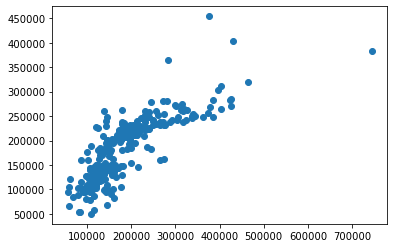

In [39]:
# Plot the two arrays using a scatterplot
plt.scatter(y_test, predictions)

(array([ 12.,  68., 141.,  47.,  17.,   6.,   0.,   0.,   0.,   1.]),
 array([-122382.42234285,  -73963.23993453,  -25544.05752621,
          22875.12488211,   71294.30729043,  119713.48969875,
         168132.67210707,  216551.85451539,  264971.03692371,
         313390.21933203,  361809.40174035]),
 <BarContainer object of 10 artists>)

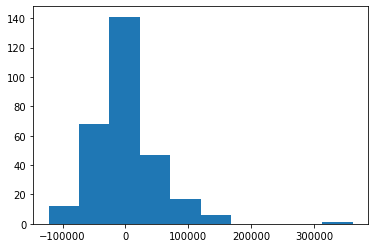

In [40]:
# Another way to visually assess the performance of our model
plt.hist(y_test - predictions)

In [41]:
import  scipy.signal.signaltools

In [42]:
#!pip install statsmodels --upgrade

In [43]:
from scipy.signal._signaltools import _centered

In [44]:
import statsmodels.api as sm

In [45]:
X = df[['LotArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
Y = df[['SalePrice']]
X = sm.add_constant(X)
model = sm. OLS(Y,X).fit()
predictions = model.predict(X)

In [46]:
# Calculate R2
print_model = model.summary()
print(print_model)
predictions

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     381.3
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          4.29e-294
Time:                        21:35:51   Log-Likelihood:                -17854.
No. Observations:                1460   AIC:                         3.572e+04
Df Residuals:                    1453   BIC:                         3.576e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.388e+05   1.09e+05     -6.775   

0       217113.372513
1       203630.917290
2       223836.455262
3        94838.620631
4       241695.765716
            ...      
1455    222870.810972
1456    229742.697819
1457    178857.096102
1458    136172.152621
1459    190549.194670
Length: 1460, dtype: float64

In [47]:
# import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

In [48]:
# Calculate RMSE
print('RMSE:'+str(np.sqrt(mean_squared_error(predictions,Y))))

RMSE:49494.9233990544


# Step 8: Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).

In [49]:
#import pakages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [50]:
#load the data
digits = datasets.load_digits()

In [51]:
#standardize the feature matrix
features = StandardScaler().fit_transform(digits.data)

In [52]:
#creata a PCA that will retain 90% of variance
pca = PCA(n_components=0.90, whiten=True)

In [53]:
#conduct PCA 
features_pca = pca.fit_transform(features)

In [54]:
#show results
print("Original number of features:", features.shape[1])
print("Reduce number of features:", features_pca.shape[1])

Original number of features: 64
Reduce number of features: 31


# Step 9: How many features are in the PCA-transformed matrix?

In [55]:
# find out the features in the PCA
df1.shape

(1460, 75)

75 features are available in this PCA-transfprmed matrix 

# Step 10: Transform but DO NOT fit the test features with the same PCA.

In [56]:
target_variable = df1["SalePrice"]
features_variable=df1.drop("SalePrice",axis=1)

In [57]:
# Assigning target_variable with "SalePrice"  column and
#features_variable with the remaining columns
print(target_variable.shape)
print(features_variable.shape)

(1460,)
(1460, 74)


Now, let us see how this features_variable of dimensions 1460 data points and 74 features are reduced using PCA.

In [58]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)

In [59]:
from sklearn.preprocessing import scale # Data selecting
from sklearn import decomposition # PCA


In [60]:
# Data scaling
X = scale(x)

In [61]:
# perform PCA analysis
# define the number of PCA use as 3
pca = decomposition.PCA(n_components=3)
pca.fit(x)

PCA(n_components=3)

In [62]:
scores = pca.transform(x)

In [63]:

scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,-2069.003664,-176.691436,-36.923518
1,-914.418062,215.134641,1.414221
2,731.546590,-144.925862,-33.886593
3,-970.228483,-291.803128,47.858123
4,3743.932018,45.380334,-27.277276
...,...,...,...
1455,-2600.854712,-73.733706,-29.983380
1456,2663.561863,454.014042,6.441913
1457,-1473.646053,110.587285,33.397638
1458,-799.540038,29.131560,22.082787


In [64]:
scores_df['PC1']

0      -2069.003664
1       -914.418062
2        731.546590
3       -970.228483
4       3743.932018
           ...     
1455   -2600.854712
1456    2663.561863
1457   -1473.646053
1458    -799.540038
1459    -577.509678
Name: PC1, Length: 1460, dtype: float64

# Step 11: Repeat step 7 with your PCA transformed data.

In [65]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
X = df1[['LotArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
Y = df1['SalePrice']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()

In [70]:
model.fit(x_train, y_train)

LinearRegression()

In [71]:
print(model.coef_)

[ 1.36423509e+00  4.82268759e+02  6.49107206e+01  4.33421628e+04
  3.43937196e+04 -3.47540381e+03]


In [72]:
print(model.intercept_)

-925526.7118232716


In [73]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
LotArea,1.364235
YearBuilt,482.268759
TotalBsmtSF,64.910721
FullBath,43342.162767
HalfBath,34393.719556
BedroomAbvGr,-3475.403811


In [74]:
predictions = model.predict(x_test)

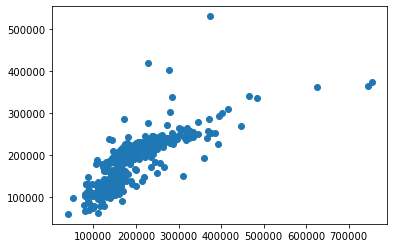

In [75]:
plt.scatter(y_test, predictions)

(array([  2.,   5., 117., 240.,  55.,  12.,   4.,   1.,   0.,   2.]),
 array([-191375.63521017, -134182.05728226,  -76988.47935435,
         -19794.90142644,   37398.67650147,   94592.25442938,
         151785.83235729,  208979.4102852 ,  266172.98821311,
         323366.56614102,  380560.14406893]),
 <BarContainer object of 10 artists>)

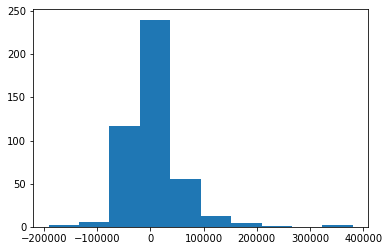

In [76]:
plt.hist(y_test - predictions)

In [77]:
from sklearn import metrics

In [78]:
metrics.mean_absolute_error(y_test, predictions)

32904.29437362342

In [79]:
metrics.mean_squared_error(y_test, predictions)

2702211138.7393875

In [80]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

51982.79656520403

In [81]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

51982.79656520403

In [82]:
X = df[['LotArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
Y = df[['SalePrice']]
X = sm.add_constant(X)
model = sm. OLS(Y,X).fit()
predictions = model.predict(X)

In [83]:
# Calculate R2
print_model = model.summary()
print(print_model)
predictions

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     381.3
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          4.29e-294
Time:                        21:35:53   Log-Likelihood:                -17854.
No. Observations:                1460   AIC:                         3.572e+04
Df Residuals:                    1453   BIC:                         3.576e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.388e+05   1.09e+05     -6.775   

0       217113.372513
1       203630.917290
2       223836.455262
3        94838.620631
4       241695.765716
            ...      
1455    222870.810972
1456    229742.697819
1457    178857.096102
1458    136172.152621
1459    190549.194670
Length: 1460, dtype: float64

# Step 12: Take your original training features (from step 6) and apply a min-max scaler to them.

# Step 13: Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [84]:
x = df1[['LotArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
y = df1['SalePrice']

In [85]:
# Ipmort the scikit learn scaler
from sklearn.datasets import load_boston
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
# Use trained test method
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2) 

In [88]:
x_train.shape, x_test.shape

((1168, 6), (292, 6))

In [89]:
x_train.head()

,LotArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr
604,12803,2002,1494,2,0,3
591,13478,2008,1722,2,1,3
1279,7500,1920,698,1,0,2
769,53504,2003,1650,3,1,4
1218,6240,1947,0,1,0,2


In [90]:
x_train.head()

,LotArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr
604,12803,2002,1494,2,0,3
591,13478,2008,1722,2,1,3
1279,7500,1920,698,1,0,2
769,53504,2003,1650,3,1,4
1218,6240,1947,0,1,0,2


In [91]:
# Scaling the data
scaler = MinMaxScaler()


In [92]:
# fit the scaler to the train set, it will learn the parametrs
scaler.fit(x_train)

MinMaxScaler()

In [93]:
# transfer train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [94]:
# fit the scaler to the trainig set, it will learn the parametrs
scaler.fit(x_train)

MinMaxScaler()

In [95]:
# the scaler stores the max of the fetures 
scaler.data_max_

array([2.15245e+05, 2.00900e+03, 6.11000e+03, 3.00000e+00, 2.00000e+00,
       8.00000e+00])

In [96]:
# the scaler stores the mean of the fetures 
scaler.data_min_

array([1477., 1872.,    0.,    0.,    0.,    0.])

In [97]:
# the scaler stores the standard deviation of featuresin scale_
scaler.scale_

array([4.67796864e-06, 7.29927007e-03, 1.63666121e-04, 3.33333333e-01,
       5.00000000e-01, 1.25000000e-01])

# Step 14: Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

# Step 15: Repeat step 7 with the high variance data.

In [98]:
target_variable = df1["SalePrice"]
features_variable=df1.drop("SalePrice",axis=1)

In [99]:
from sklearn.datasets import load_digits

In [100]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [101]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [102]:
x = df1[['LotArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath']]
y = df1['SalePrice']

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
model = LinearRegression()

In [106]:
model.fit(x_train, y_train)

LinearRegression()

In [107]:
predictions = model.predict(x_test)

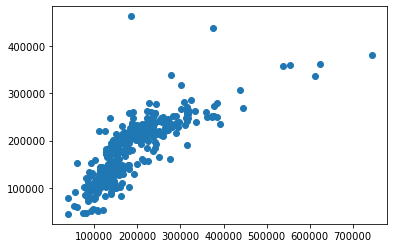

In [108]:
plt.scatter(y_test, predictions)

In [109]:
X = df[['LotArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath']]
Y = df[['SalePrice']]
X = sm.add_constant(X)
model = sm. OLS(Y,X).fit()
predictions = model.predict(X)

In [110]:
# Calculate R2
print_model = model.summary()
print(print_model)
predictions

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     457.1
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          3.96e-295
Time:                        21:35:54   Log-Likelihood:                -17854.
No. Observations:                1460   AIC:                         3.572e+04
Df Residuals:                    1454   BIC:                         3.575e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.871e+05   1.01e+05     -7.756      

0       216917.467197
1       203663.657742
2       223558.574875
3        95181.153944
4       243580.787132
            ...      
1455    222572.395600
1456    229741.865708
1457    180364.777287
1458    135008.191382
1459    191023.894162
Length: 1460, dtype: float64

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.20714171,  1.05099379, -0.45930254,  0.78974052,  1.22758538],
       [-0.09188637,  0.15673371,  0.46646492,  0.78974052, -0.76162067],
       [ 0.07347998,  0.9847523 , -0.31336875,  0.78974052,  1.22758538],
       ...,
       [-0.14781027, -1.00249232,  0.21564122,  0.78974052, -0.76162067],
       [-0.08016039, -0.70440562,  0.04690528, -1.02604084, -0.76162067],
       [-0.05811155, -0.20759447,  0.45278362, -1.02604084,  1.22758538]])

In [113]:
from sklearn.model_selection import train_test_split


In [114]:
# Use trained test method
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=30) 

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.0

In [117]:
X.shape

(1460, 6)

In [118]:
# will do the PCA
from sklearn.decomposition import PCA

In [119]:
#read .95 of usfull features 
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1460, 1)

In [120]:
X_pca

array([[-2069.00366522],
       [ -914.41806341],
       [  731.54658865],
       ...,
       [-1473.64606372],
       [ -799.54002977],
       [ -577.50967978]])

In [121]:
pca.explained_variance_ratio_

array([0.99819416])

In [122]:
pca.n_components_

1

In [123]:
# Use trained test method
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=30) 

In [124]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_pca, y_train)
model.score(x_test_pca, y_test)

0.0

In [125]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1460, 2)

In [126]:
X_pca

array([[-2069.00366522,  -176.69144173],
       [ -914.41806341,   215.13463614],
       [  731.54658865,  -144.92586696],
       ...,
       [-1473.64606372,   110.5872419 ],
       [ -799.54002977,    29.1315926 ],
       [ -577.50967978,   204.95172372]])

In [127]:
pca.explained_variance_ratio_

array([0.99819416, 0.00179818])

In [128]:
# Use trained test method
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=30) 
model = LogisticRegression(max_iter=1000)
model.fit(x_train_pca, y_train)
model.score(x_test_pca, y_test)

0.0

# Step 16: Summarize your findings

### I find what accuracy I want and then reduce my demensions accordingly. 

# #########################################

# Part 2: Categorical Feature Selection

# Step 1: Import the data as a data frame and ensure it is loaded correctly.

In [129]:
#read the "train.csv" file
df2 = pd.read_csv('mushrooms.csv')
df2

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Step 2: Convert the categorical features (all of them) to dummy variables.


In [130]:
# convert the categorical columns to numerical columns 
df2 = df2.select_dtypes('object')
pd.get_dummies(df2, columns = df2.columns)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# Step 3: Split the data into a training and test set.

In [131]:
df2.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [132]:
x1 = df2[['cap-shape','cap-surface','bruises', 'gill-attachment','gill-spacing', 'gill-size', 'gill-color',
         'stalk-shape', 'stalk-root', 'stalk-surface-above-ring','veil-type', 'veil-color', 'ring-number']]
y1= df2[['class', 'cap-color', 'population']]

In [133]:
# Use trained test method
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size = 0.2) 

In [134]:
x1_train

,cap-shape,cap-surface,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,veil-type,veil-color,ring-number
3053,f,f,t,f,c,b,w,t,b,s,p,w,o
5478,f,s,t,f,c,b,h,t,b,f,p,w,o
2835,x,f,t,f,c,b,w,t,b,s,p,w,o
2056,x,f,t,f,c,b,u,t,b,s,p,w,o
410,x,s,t,f,c,b,w,e,c,s,p,w,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,b,s,t,f,c,b,n,e,c,s,p,w,o
5964,k,f,f,f,c,n,w,e,?,k,p,w,o
8111,k,s,f,f,w,b,p,e,?,s,p,w,t
2197,x,f,t,f,c,b,u,t,b,s,p,w,o


In [135]:
y1_train

,class,cap-color,population
3053,e,g,v
5478,p,g,s
2835,e,e,y
2056,e,g,v
410,e,w,s
...,...,...,...
1318,e,y,s
5964,p,n,v
8111,e,w,n
2197,e,g,y


In [136]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [137]:
clf.fit(x_train,y_train)

LinearRegression()

In [138]:
#clf.predict(x1_test)

# Step 4: Fit a decision tree classifier on the training set.

# Step 6: Create a visualization of the decision tree.

In [139]:
X = df2.iloc[:,:-1]

In [140]:
X

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,p,w,o,p,k,s
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,p,w,o,p,n,n
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,p,w,o,p,n,n
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,p,w,o,p,k,s
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,p,w,o,e,n,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,p,o,o,p,b,c
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,p,n,o,p,b,v
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,p,o,o,p,b,c
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,p,w,o,e,w,v


In [141]:
Y = df2.iloc[:,21]

In [142]:
Y

0       s
1       n
2       n
3       s
4       a
       ..
8119    c
8120    v
8121    c
8122    v
8123    c
Name: population, Length: 8124, dtype: object

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
# Converting categorical features to numerical value 
labelencoder_X = LabelEncoder()

In [145]:
X = X.apply(LabelEncoder().fit_transform)

In [146]:
X

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,0,2,1,4,2,3
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,0,2,1,4,3,2
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,0,2,1,4,3,2
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,0,2,1,4,2,3
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,0,2,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,1,4,0,1
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,0,1,4,0,4
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,0,1,1,4,0,1
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,0,2,1,0,7,4


In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
regressor = DecisionTreeClassifier()

In [149]:
regressor.fit(X.iloc[:,1:5], Y)

DecisionTreeClassifier()

In [150]:
X_in = np.array([1,1,0,0])

In [151]:
Y_pred = regressor.predict([X_in])

C:\Users\Yousof\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [152]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [153]:
from six import StringIO
from sklearn.externals.six import StringIO

In [154]:
from IPython.display import Image

In [155]:
from sklearn.tree import export_graphviz

In [156]:
#! pip install pydotplus

In [157]:
import pydotplus

In [158]:
dot_data = StringIO()

In [159]:
export_graphviz(regressor, out_file = dot_data, filled = True, rounded = True, special_characters = True)

In [160]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [161]:
#! pip install graphviz

In [162]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import os

In [163]:
#conda install graphviz

In [164]:
#graph.write_png('tree.png')

# Step 5: Report the accuracy and create a confusion matrix for the model prediction on the test set.


In [165]:
# create classifier
logit = LogisticRegression()

In [166]:
# find the model accuracy
from sklearn.model_selection import cross_val_score

In [167]:
cross_val_score(logit, X, Y, scoring = "accuracy")

C:\Users\Yousof\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yousof\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.90276923, 1.        , 0.98892308, 0.93969231, 0.85652709])

In [168]:
df2.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [169]:
# Get target variable
y1_train = X['population'] 
x1_train = X.drop(["population"], axis=1)
                      
X.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,0,2,1,4,2,3
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,0,2,1,4,3,2
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,0,2,1,4,3,2
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,0,2,1,4,2,3
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,0,2,1,0,3,0


In [170]:
# Initialize a logistic regression model 
logistic = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
# Train the model
logistic = logistic.fit(x1_train, y1_train)
# Print score of model(using test dataset)
#print(logistic.score(x1_test, y1_test))

C:\Users\Yousof\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [171]:
# Create a confusion matrix for the test set predictions
#y_pred_forest  = forest.predict(x1_test)
y_pred_logistic  = logistic.predict(x1_train)

In [172]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_logistic = confusion_matrix(y1_train, y_pred_logistic, labels=[1,0])
confusion_matrix_logistic

array([[287,   0],
       [  0, 200]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix Logistic Regression')

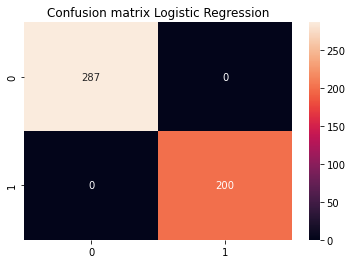

In [173]:
# plot the confusion matrix
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic, annot=True, fmt="d")
ax.set_title('Confusion matrix Logistic Regression')

Text(0.5, 1.0, 'Confusion matrix Logistic Regression')

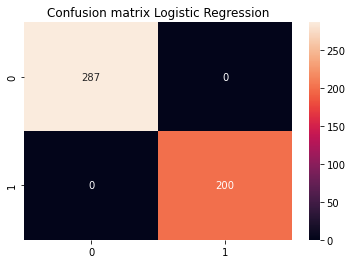

In [174]:
# plot the confusion matrix
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic, annot=True, fmt="d")
ax.set_title('Confusion matrix Logistic Regression')

# Step 7: Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).


In [175]:
# load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2, f_classif

In [176]:
# select five fetures with highest F-value
#fvalue_selector = SelectKBest(f_classif, k='all')
#features_kbest = fvalue_selector.fit_transform(features, target)

In [177]:
#show results
#print("Original number of features:", features.shape[1])
#print("Reduced numer of features:", features_kbest.shape[1])

In [178]:
# load library
from sklearn.feature_selection import SelectPercentile

In [179]:
# select top 75% of features with highest F-value
#fvalue_selector = SelectPercentile(f_classif, percentile=75)
#features_kbest = fvalue_selector.fit_transform(features, target)

In [180]:
#show results
#print("Original number of features:", features.shape[1])
#print("Reduced numer of features:", features_kbest.shape[1])

########################

In [181]:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [182]:
df2.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [183]:
# find out the missing values 
df2.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## 

In [184]:
df2.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [185]:
from sklearn.preprocessing import OrdinalEncoder

In [186]:
enc = OrdinalEncoder()

In [187]:
df2.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [188]:
enc.fit(df2[['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor','gill-attachment',
             'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
             'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
             'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']])

OrdinalEncoder()

In [189]:
# Transform data to numerical data
df2[['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor','gill-attachment',
             'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
             'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
             'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']] = enc.transform(df2[['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor','gill-attachment',
             'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
             'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
             'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']])

In [190]:
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0


In [191]:
df2.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [192]:
#get the target variable
X = df2.iloc[:, 0:5]
y = df2.iloc[:, -1]#get the last column


In [193]:
X.head()

,class,cap-shape,cap-surface,cap-color,bruises
0,1.0,5.0,2.0,4.0,1.0
1,0.0,5.0,2.0,9.0,1.0
2,0.0,0.0,2.0,8.0,1.0
3,1.0,5.0,3.0,8.0,1.0
4,0.0,5.0,2.0,3.0,0.0


In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state=123)

In [196]:
f_score = chi2(X_train, y_train)

In [197]:
f_score

(array([ 566.09122442,  126.18728606,  329.82518751, 1473.08949955,
         960.82989175]),
 array([4.79296268e-119, 8.15613892e-025, 3.29697021e-068, 0.00000000e+000,
        2.64515423e-204]))

In [198]:
f_score[1]

array([4.79296268e-119, 8.15613892e-025, 3.29697021e-068, 0.00000000e+000,
       2.64515423e-204])

In [199]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns

In [200]:
pvalues

class          4.792963e-119
cap-shape       8.156139e-25
cap-surface     3.296970e-68
cap-color       0.000000e+00
bruises        2.645154e-204
dtype: float64

In [201]:
pvalues.sort_values(ascending=False)

cap-shape       8.156139e-25
cap-surface     3.296970e-68
class          4.792963e-119
bruises        2.645154e-204
cap-color       0.000000e+00
dtype: float64

In [202]:
# load data
#iris = load_iris()
features = X
target = y


In [203]:
# convert to categorical data by converting data to integers
#features = features.astype(int)

In [204]:
# select five fetures with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k='all')
features_kbest = chi2_selector.fit_transform(features, target)

In [205]:
#show results
print("Original number of features:", features.shape[1])
print("Reduced numer of features:", features_kbest.shape[1])

Original number of features: 5
Reduced numer of features: 5


In [206]:
df2.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Step 8: Which five features were selected in step 7?

In [207]:
# below are the feature were selected in previous step 
'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises' 

('class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises')

# Step 9: Repeat steps 4 and 5 with the five best features selected in step 7.

In [208]:
df3=df2[['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises']]
df3

,class,cap-shape,cap-surface,cap-color,bruises
0,1.0,5.0,2.0,4.0,1.0
1,0.0,5.0,2.0,9.0,1.0
2,0.0,0.0,2.0,8.0,1.0
3,1.0,5.0,3.0,8.0,1.0
4,0.0,5.0,2.0,3.0,0.0
...,...,...,...,...,...
8119,0.0,3.0,2.0,4.0,0.0
8120,0.0,5.0,2.0,4.0,0.0
8121,0.0,2.0,2.0,4.0,0.0
8122,1.0,3.0,3.0,4.0,0.0


In [209]:
#get the target variable
X = df3.iloc[:, 0:4]
y = df3.iloc[:, -1]#get the last column


In [210]:
X

,class,cap-shape,cap-surface,cap-color
0,1.0,5.0,2.0,4.0
1,0.0,5.0,2.0,9.0
2,0.0,0.0,2.0,8.0
3,1.0,5.0,3.0,8.0
4,0.0,5.0,2.0,3.0
...,...,...,...,...
8119,0.0,3.0,2.0,4.0
8120,0.0,5.0,2.0,4.0
8121,0.0,2.0,2.0,4.0
8122,1.0,3.0,3.0,4.0


In [211]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
8119    0.0
8120    0.0
8121    0.0
8122    0.0
8123    0.0
Name: bruises, Length: 8124, dtype: float64

In [212]:
cross_val_score(logit, X, y, scoring = "accuracy")

array([0.41538462, 0.76307692, 0.73169231, 0.80676923, 0.53140394])

In [219]:
# Get target variable
y2_train = df3['bruises'] 
x2_train = df3.drop(['bruises'], axis=1)
                      

In [222]:
# Initialize a logistic regression model 
logistic = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
# Train the model
logistic = logistic.fit(x2_train, y2_train)
# Print score of model(using test dataset)
#print(logistic.score(x1_test, y1_test))

In [224]:
# Create a confusion matrix for the test set predictions
#y_pred_forest  = forest.predict(x1_test)
y_pred_logistic  = logistic.predict(x2_train)

In [225]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_logistic = confusion_matrix(y2_train, y_pred_logistic, labels=[1,0])
confusion_matrix_logistic

array([[2704,  672],
       [1256, 3492]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix Logistic Regression')

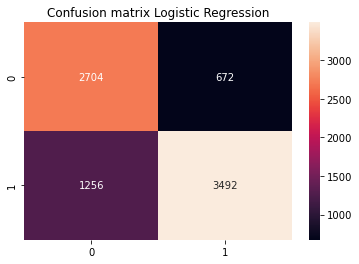

In [226]:
# plot the confusion matrix
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic, annot=True, fmt="d")
ax.set_title('Confusion matrix Logistic Regression')

Text(0.5, 1.0, 'Confusion matrix Logistic Regression')

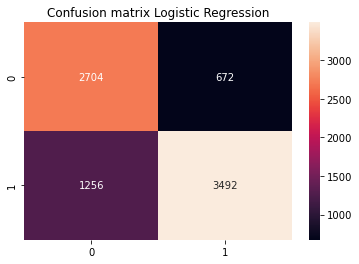

In [227]:
# plot the confusion matrix
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic, annot=True, fmt="d")
ax.set_title('Confusion matrix Logistic Regression')

# Step 10: Summarize your findings.

###  I have gone through a brief explanation of how the chi-square statistics test works and how I can apply it to the datasets. I've learned how measure of the difference between the observed and expected frequencies of the outcomes of a set of events or variables. Chi-square is useful for analyzing such differences in categorical variables, especially those nominal in nature.